# Prédiction du succès télémarketing

## 1- Data loading and cleaning

In [33]:
# importation des données
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from pandas.api.types import is_numeric_dtype, is_string_dtype, is_datetime64_any_dtype
from IPython.display import display

df = pd.read_csv('bank-full.csv', sep=';')


In [34]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [35]:
# Nous avons plusieurs valeurs nulles qui sont matérialisées par unknown, nous allons les remplacer par des NaN


df = pd.read_csv('bank-full.csv', sep=';')

df=df.replace('unknown', np.NaN)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [36]:
#Nous allons investiguer le dataset

# nombre de colonnes
# pourcentage de valeurs non nulles
#nombre de variables numériques
#nombre de variables catégorielles
# les différents types de variables
# description statistiques brêve

In [37]:
def first_infos(df):

    n_cols = len(df.columns)
    n_rows = len(df)
    n_duplicates = df.duplicated().sum()
    n_na = df.isna().sum().sum()

    return(n_cols, n_rows, n_duplicates, n_na)


def print_infos(df, n_num, n_cat, n_text, n_date):

    cols, rows, duplicates, na = first_infos(df)

    print('Dataframe :\n\t' + str(rows) + ' Rows \n \t' +
          str(na) + ' Missing values\n\t' +
          str(duplicates) + ' Duplicates\n \t' +
          str(cols) + ' Features\n \t' +
          str(n_cat) + ' Categorical\n \t' +
          str(n_num) + ' Numerical\n \t' +
          str(n_text) + ' Text\n \t' +
          str(n_date) + ' Date')
    

def alerts(df):

    # seuils à modifier en fonction des données
    thresh_na = 0.25
    thresh_balance = 0.8

    for col in df.columns:
        if (df[col].count()/len(df)) < thresh_na:
            print('\nThe feature ' + col + ' contains too much missing values!')
        if df[col].value_counts(normalize=True).values[0] > thresh_balance:
            print('\nThe feature ' + col + ' is Imbalanced. Try to fix it !')

In [38]:
def quality_check(df):
    # On initialise les variables qui comptabiliseront le nombre de chaque type
    n_text = 0
    n_num = 0
    n_cat = 0
    n_date = 0

    data_qlt_df = pd.DataFrame(index=np.arange(0, len(df.columns)),
                               columns=('column_name', 'col_data_type', 'non_null_values', '%_non_null',
                                        'unique_values_count', 'column_type')
                               )

    for ind, col in enumerate(df.columns):
        # On compte le nombre de valeurs uniques par variable
        col_unique_count = df[col].nunique()

        # On compte le nombre de valeurs non nulles
        non_null = df[col].count()

        # On calcule le pourcentage de valeurs non nulles
        p_non_null = (df[col].count()/len(df))*100

        # On associe à chaque colonne un type en fonction de seuils arbitraires
        if is_datetime64_any_dtype(df[col]):
            col_type = 'Date'
            n_date += 1
        elif is_numeric_dtype(df[col]) & (col_unique_count > 50):
            col_type = 'Numerical'
            n_num += 1
        elif (is_string_dtype(df[col])) & (col_unique_count > 100):
            col_type = 'Text'
            n_text += 1
        else:
            col_type = 'Categorical'
            n_cat += 1

        data_qlt_df.loc[ind] = [col,
                                df[col].dtype,
                                non_null,
                                p_non_null,
                                col_unique_count,
                                col_type
                                ]

    # On utilise la transposé de describe() pour obtenir les statistiques sur les variables numériques
    raw_num_df = df.describe().T.round(2)

    # Puis on merge le résultat avec le reste pour obtenir un Dataframe complet
    data_qlt_df = pd.merge(data_qlt_df, raw_num_df, how='left',
                           left_on='column_name', right_index=True)

    # On affiche les infos globales
    print_infos(df,  n_num, n_cat, n_text, n_date)

    # On affiche les alertes s'il y en a
    alerts(df)

    # afficher le Tableau récapitulatif
    display(data_qlt_df)

In [39]:
df = pd.read_csv('bank-full.csv', sep = ";")
df = df.replace("unknown", np.NaN)
quality_check(df)

Dataframe :
	45211 Rows 
 	52124 Missing values
	0 Duplicates
 	17 Features
 	13 Categorical
 	4 Numerical
 	0 Text
 	0 Date

The feature default is Imbalanced. Try to fix it !

The feature loan is Imbalanced. Try to fix it !

The feature contact is Imbalanced. Try to fix it !

The feature pdays is Imbalanced. Try to fix it !

The feature previous is Imbalanced. Try to fix it !

The feature poutcome contains too much missing values!

The feature y is Imbalanced. Try to fix it !


,column_name,col_data_type,non_null_values,%_non_null,unique_values_count,column_type,count,mean,std,min,25%,50%,75%,max
0,age,int64,45211,100.0,77,Numerical,45211.0,40.94,10.62,18.0,33.0,39.0,48.0,95.0
1,job,object,44923,99.362987,11,Categorical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,marital,object,45211,100.0,3,Categorical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,education,object,43354,95.892593,3,Categorical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,default,object,45211,100.0,2,Categorical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,balance,int64,45211,100.0,7168,Numerical,45211.0,1362.27,3044.77,-8019.0,72.0,448.0,1428.0,102127.0
6,housing,object,45211,100.0,2,Categorical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,loan,object,45211,100.0,2,Categorical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,contact,object,32191,71.201699,2,Categorical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,day,int64,45211,100.0,31,Categorical,45211.0,15.81,8.32,1.0,8.0,16.0,21.0,31.0


In [40]:
# Gestion des valeurs manquantes

In [41]:
df.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [42]:
num_missing = df.isnull().sum()

# Filtrer l'objet Series sur les colonnes contenant >5% de valeurs manquantes
drop_missing_cols = num_missing[(num_missing > len(df)/20)].sort_values()

# Supprimer ces colonnes dans le DataFrame. Noter l'utilisation de l'accesseur .index
df = df.drop(drop_missing_cols.index, axis=1)
df.shape[1]


15

In [43]:
# colonne job contient plus de 10 valeurs unique nous allons la supprimer
df = df.drop( "job" , axis = 1)

In [44]:
# nous allons supprimer toutes les lignes contenants des valeurs nules dans les deux colonnes catégorielles "age" et "education"
df = df.dropna(subset = ['education'])
df.isnull().sum()

age          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [45]:
df_object = df.select_dtypes(include=['object']).copy()

for col in df_object.columns:
    df[col]=df[col].astype('category')
    
df.dtypes

age             int64
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
y            category
dtype: object

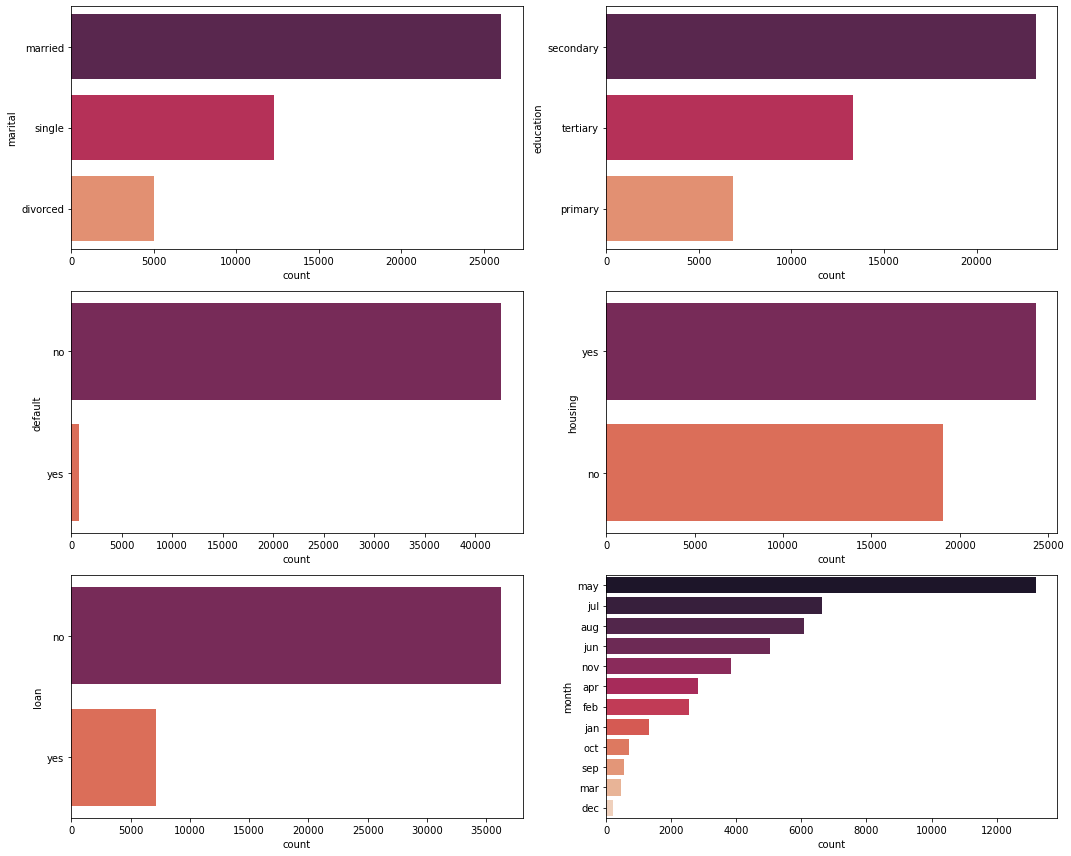

In [51]:
# nous allons visualisé la distribution des variables catégorielles

fig, axes = plt.subplots(3, 2, figsize=(15,12))
axes = axes.flatten()

for ax, col in zip(axes, df.select_dtypes('category').columns):
    sns.countplot(y=col, data=df, ax=ax,palette="rocket" ,order=df[col].value_counts().index);

plt.tight_layout()
plt.show()

## 2 - Data Modeling

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Nous allons transformer les variables catégorielles en en variables numériques

from sklearn.preprocessing import LabelEncoder 
class MultiColumnLabelEncoder: 
    def __init__(self,columns = None): 
        self.columns = ['marital', 'education', 'default', 'housing', 'loan', 'month', 'y']

    def fit(self,X,y=None): 
        return self 

    def transform(self,X):
        output = df.copy() 
        if self.columns is not None: 
            for col in self.columns: 
                output[col] = LabelEncoder().fit_transform(output[col]) 
        else: 
            for colname,col in output.iteritems(): 
                output[colname] = LabelEncoder().fit_transform(col) 
        return output 

    def fit_transform(self,X,y=None):
         return self.fit(X,y).transform(X)
        
        
df=MultiColumnLabelEncoder(columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'y']).fit_transform(df)     
df.head()

,age,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,1,2,0,2143,1,0,5,8,261,1,-1,0,0
1,44,2,1,0,29,1,0,5,8,151,1,-1,0,0
2,33,1,1,0,2,1,1,5,8,76,1,-1,0,0
5,35,1,2,0,231,1,0,5,8,139,1,-1,0,0
6,28,2,2,0,447,1,1,5,8,217,1,-1,0,0


In [17]:
# Nous allons séparer la variable des autes variables
target = df[['y']]
data = df.drop(columns=['y'])
print(data.shape,target.shape)

(43354, 13) (43354, 1)


In [18]:
# séparation des données en train  et test set

x_train,x_test,y_train,y_test = train_test_split(data,target,random_state=100,test_size=0.2)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(34683, 13) (34683, 1)
(8671, 13) (8671, 1)


## 3 - DecisionTree_RFECV

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import auc,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV

In [19]:
# implémentation DecisionTree avec selection de variable par validation croisée

model = DecisionTreeClassifier(max_depth=5,min_samples_split=100)
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(10), scoring='roc_auc')
rfecv.fit(x_train,y_train)


print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 4


In [20]:
clf = DecisionTreeClassifier()
samplesplits = [5, 10, 100, 500]
maximumdepth = [1, 5, 10, 50, 100, 500, 1000]
parameters = {'min_samples_split':samplesplits ,'max_depth':maximumdepth}

model = GridSearchCV(estimator=clf, param_grid=parameters, cv=3, n_jobs=-1, scoring='roc_auc',return_train_score=True)
model.fit(x_train,y_train)
print("Model with best parameters :\n",model.best_params_)

### model
best_estimator = DecisionTreeClassifier(**model.best_params_)
best_estimator = best_estimator.fit(x_train,y_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, best_estimator.predict_proba(x_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, best_estimator.predict_proba(x_test)[:,1])

print('Area under train roc {}'.format(auc(train_fpr, train_tpr)))
print('Area under test roc {}'.format(auc(test_fpr, test_tpr)))

Model with best parameters :
 {'max_depth': 50, 'min_samples_split': 500}
Area under train roc 0.913277547111231
Area under test roc 0.8845939086635415


##  4 - simple Artificial neural network

In [22]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense

In [23]:
classifier = Sequential()
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(x_train, y_train, batch_size = 10, epochs = 100)
score_train = classifier.evaluate(x_train, y_train)
score_test = classifier.evaluate(x_test, y_test)

Epoch 1/100
3469/3469 [==============================] - 3s 914us/step - loss: 0.3091 - accuracy: 0.8846
Epoch 2/100
3469/3469 [==============================] - 3s 936us/step - loss: 0.2835 - accuracy: 0.8875
Epoch 3/100
3469/3469 [==============================] - 3s 912us/step - loss: 0.2811 - accuracy: 0.8871
Epoch 4/100
3469/3469 [==============================] - 3s 912us/step - loss: 0.2759 - accuracy: 0.8859
Epoch 5/100
3469/3469 [==============================] - 3s 953us/step - loss: 0.2735 - accuracy: 0.8875
Epoch 6/100
3469/3469 [==============================] - 3s 951us/step - loss: 0.2711 - accuracy: 0.8879
Epoch 7/100
3469/3469 [==============================] - 3s 955us/step - loss: 0.2715 - accuracy: 0.8882
Epoch 8/100
3469/3469 [==============================] - 3s 946us/step - loss: 0.2715 - accuracy: 0.8884
Epoch 9/100
3469/3469 [==============================] - 3s 919us/step - loss: 0.2693 - accuracy: 0.8874
Epoch 10/100
3469/3469 [==============================]

Epoch 78/100
3469/3469 [==============================] - 3s 853us/step - loss: 0.2808 - accuracy: 0.8826
Epoch 79/100
3469/3469 [==============================] - 3s 857us/step - loss: 0.2687 - accuracy: 0.8826
Epoch 80/100
3469/3469 [==============================] - 3s 863us/step - loss: 0.2787 - accuracy: 0.8826
Epoch 81/100
3469/3469 [==============================] - 3s 918us/step - loss: 0.2822 - accuracy: 0.8837
Epoch 82/100
3469/3469 [==============================] - 3s 893us/step - loss: 0.2875 - accuracy: 0.8826
Epoch 83/100
3469/3469 [==============================] - 3s 860us/step - loss: 0.2954 - accuracy: 0.8825
Epoch 84/100
3469/3469 [==============================] - 3s 865us/step - loss: 0.2828 - accuracy: 0.8826
Epoch 85/100
3469/3469 [==============================] - 3s 862us/step - loss: 0.2804 - accuracy: 0.8825
Epoch 86/100
3469/3469 [==============================] - 3s 858us/step - loss: 0.2777 - accuracy: 0.8827
Epoch 87/100
3469/3469 [======================

In [24]:
score_train = classifier.evaluate(x_train, y_train)
score_test = classifier.evaluate(x_test, y_test)

271/271 [==============================] - 0s 574us/step - loss: 0.2898 - accuracy: 0.8886


## 5 - SVC

In [21]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
SVM = SVC(kernel="rbf", random_state=None, probability=True, cache_size=500, gamma=0.1).fit(x_train, y_train)

#Predict the response for test dataset
y_pred_SVM = SVM.predict(x_test)

print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7705
           1       0.00      0.00      0.00       966

    accuracy                           0.89      8671
   macro avg       0.44      0.50      0.47      8671
weighted avg       0.79      0.89      0.84      8671

